In [1]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import mwdata as mw


In [2]:
# import mwdata as mw # Alpha release
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import datetime

In [4]:
pd.options.display.max_columns = 50

In [5]:
df = pd.read_csv("gs://sanofi-ml-workshop-lending-club/data/DR_Demo_Lending_Club.csv")

In [7]:
df.to_csv("data.csv")

In [8]:
pd.options.display.max_colwidth = 100

In [9]:
df.shape

(10000, 28)

In [10]:
df.head()

Id  is_bad             emp_title emp_length home_ownership  annual_inc  \
0   1       0     Time Warner Cable         10       MORTGAGE     50000.0   
1   2       0     Ottawa University          1           RENT     39216.0   
2   3       0        Kennedy Wilson          4           RENT     65000.0   
3   4       0    TOWN OF PLATTEKILL         10       MORTGAGE     57500.0   
4   5       0  Belmont Correctional         10       MORTGAGE     50004.0   

  verification_status pymnt_plan  \
0        not verified          n   
1        not verified          n   
2        not verified          n   
3        not verified          n   
4   VERIFIED - income          n   

                                                                                                 Notes  \
0                                                                                                  NaN   
1    Borrower added on 04/14/11 > I will be using this loan to pay off expenses accrued in the last...   
2                                                                                                  NaN   
3                                                                                                  NaN   
4                                    I want to consolidate my debt, pay for a vacation and buy a ring.   

          purpose_cat                     purpose zip_code addr_state  \
0             medical                     Medical    766xx         TX   
1  debt consolidation  My Debt Consolidation Loan    660xx         KS   
2         credit card            AP Personal Loan    916xx         CA   
3  debt consolidation     Debt Consolidation Loan    124xx         NY   
4  debt consolidation                 consolidate    439xx         OH   

   debt_to_income  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0           10.87          0.0          12/1/92             0.0   
1            9.15          0.0          11/1/05             2.0   
2           11.24          0.0           6/1/70             0.0   
3            6.18          1.0           9/1/82             0.0   
4           19.03          0.0          10/1/99             4.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN      15.0      0.0   
1                     NaN                     NaN       4.0      0.0   
2                     NaN                     NaN       4.0      0.0   
3                    16.0                     NaN       6.0      0.0   
4                     NaN                     NaN       8.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  \
0      12087        12.1       44.0                   f   
1      10114        64.0        5.0                   f   
2         81         0.6        8.0                   f   
3      10030        37.1       23.0                   f   
4      10740        40.4       21.0                   f   

   collections_12_mths_ex_med  mths_since_last_major_derog policy_code  
0                         0.0                            1         PC4  
1                         0.0                            2         PC1  
2                         0.0                            3         PC4  
3                         0.0                            2         PC2  
4                         0.0                            3         PC3

In [11]:
df.drop(['Id'], axis=1, inplace=True)

In [12]:
mw.data_summary(df)

is_bad emp_title emp_length home_ownership  \
Data Type                 int64    object     object         object   
Mean                     0.1295                                       
Standard Deviation     0.335769                                       
Median                        0                                       
Min                           0                                       
Max                           1                                       
# Zeros                    8705                                       
# Nulls                       0       592          0              0   
% Most Frequent Value     87.05      0.36       21.6          47.45   

                      annual_inc verification_status pymnt_plan   Notes  \
Data Type                float64              object     object  object   
Mean                       68203                                          
Standard Deviation       48590.3                                          
Median                     58000                                          
Min                         2000                                          
Max                       900000                                          
# Zeros                        0                                          
# Nulls                        1                   0          0    3167   
% Most Frequent Value       3.81               43.67      99.98    0.62   

                      purpose_cat purpose zip_code addr_state debt_to_income  \
Data Type                  object  object   object     object        float64   
Mean                                                                 13.3387   
Standard Deviation                                                   6.75421   
Median                                                                 13.41   
Min                                                                        0   
Max                                                                    29.99   
# Zeros                                                                   58   
# Nulls                         0       4        0          0              0   
% Most Frequent Value       44.54     5.3     1.58      17.48           0.58   

                      delinq_2yrs earliest_cr_line inq_last_6mths  \
Data Type                 float64           object        float64   
Mean                     0.148174                         1.06693   
Standard Deviation        0.50627                         1.47605   
Median                          0                               1   
Min                             0                               0   
Max                            11                              25   
# Zeros                      8910                            4602   
# Nulls                         5                5              5   
% Most Frequent Value        89.1             0.95          46.02   

                      mths_since_last_delinq mths_since_last_record open_acc  \
Data Type                            float64                float64  float64   
Mean                                 35.8903                61.6524  9.33457   
Standard Deviation                   22.3614                46.1896  4.52659   
Median                                    34                     86        9   
Min                                        0                      0        1   
Max                                      120                    119       39   
# Zeros                                  163                    267        0   
# Nulls                                 6316                   9160        5   
% Most Frequent Value                   1.63                   2.67    10.35   

                         pub_rec revol_bal revol_util total_acc  \
Data Type                float64     int64    float64   float64   
Mean                   0.0601301     14271    48.4508   22.0113   
Standard Deviation      0.251245   25437.9    28.2206   11.7094   
Me

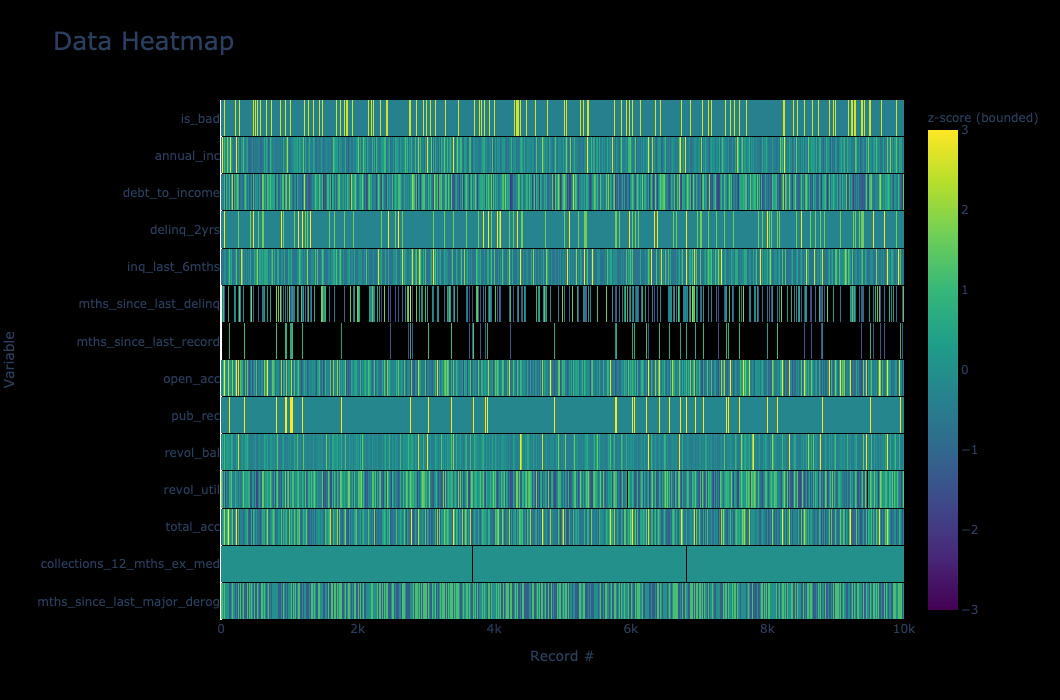

In [13]:
mw.data_heatmap(df)

In [14]:
import seaborn as sns

In [15]:
bad_map = pd.DataFrame({'is_bad':[0,1], 'Bad Loan':['No', 'Yes']})

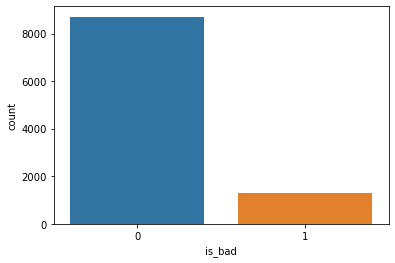

In [16]:
sns.countplot(x='is_bad', data=df.merge(bad_map))

In [17]:
mw.data_summary(df[['open_acc', 'annual_inc']])

open_acc annual_inc
Data Type              float64    float64
Mean                   9.33457      68203
Standard Deviation     4.52659    48590.3
Median                       9      58000
Min                          1       2000
Max                         39     900000
# Zeros                      0          0
# Nulls                      5          1
% Most Frequent Value    10.35       3.81

# Inspection of high income applicants

In [ ]:
df_high_income = df.loc[df.annual_inc > 600000]
df_high_income.head()

# Histograms

In [ ]:
ax = df['open_acc'].hist(bins=38, grid=False) 
ax.set_xlabel('open_acc')
ax.set_title("Histogram of open_acc")

In [ ]:
ax = df['revol_bal'].hist(bins=20, grid=False) 
ax.set_xlabel('revol_bal')
ax.set_title("Histogram of revol_bal")

In [ ]:
mw.data_summary(df[['revol_bal', 'annual_inc']])

In [ ]:
ax = df['revol_util'].hist(bins=20, grid=False) 
ax.set_xlabel('revol_util')
ax.set_title("Histogram of revol_util")

In [ ]:
mw.data_summary(df[['revol_util', 'annual_inc']])

In [ ]:
ax = df['delinq_2yrs'].hist(bins=20, grid=False) 
ax.set_xlabel('delinq_2yrs')
ax.set_title("Histogram of delinq_2yrs")

In [ ]:
mw.data_summary(df[['delinq_2yrs', 'annual_inc']])

In [ ]:
ax = df['inq_last_6mths'].hist(bins=20, grid=False) 
ax.set_xlabel('inq_last_6mths')
ax.set_title("Histogram of inq_last_6mths")

In [ ]:
mw.data_summary(df[['inq_last_6mths', 'annual_inc']])

In [ ]:
ax = df['mths_since_last_delinq'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_delinq')
ax.set_title("Histogram of mths_since_last_delinq")

In [ ]:
mw.data_summary(df[['mths_since_last_delinq', 'annual_inc']])

In [ ]:
ax = df['mths_since_last_record'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_record')
ax.set_title("Histogram of mths_since_last_record")

In [ ]:
mw.data_summary(df[['mths_since_last_record', 'annual_inc']])

In [ ]:
ax = df['pub_rec'].hist(bins=20, grid=False) 
ax.set_xlabel('pub_rec')
ax.set_title("Histogram of pub_rec")

In [ ]:
mw.data_summary(df[['pub_rec', 'annual_inc']])

In [ ]:
ax = df['total_acc'].hist(bins=20, grid=False) 
ax.set_xlabel('total_acc')
ax.set_title("Histogram of total_acc")

In [ ]:
mw.data_summary(df[['total_acc', 'annual_inc']])

In [ ]:
ax = df['collections_12_mths_ex_med'].hist(bins=20, grid=False) 
ax.set_xlabel('collections_12_mths_ex_med')
ax.set_title("Histogram of collections_12_mths_ex_med")

In [ ]:
mw.data_summary(df[['collections_12_mths_ex_med', 'annual_inc']])

In [ ]:
ax = df['mths_since_last_major_derog'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_major_derog')
ax.set_title("Histogram of mths_since_last_major_derog")

In [ ]:
mw.data_summary(df[['mths_since_last_major_derog', 'annual_inc']])

# Correlation

In [ ]:
mw.correlation_matrix(df, cluster=False)

In [ ]:
mw.correlation_matrix(df.drop(['Notes','collections_12_mths_ex_med', 'earliest_cr_line','purpose'],axis=1), categorical=True, cluster=False)

In [ ]:
def expand_year(x):
    """Converts YY -> YYYY

    Assumes there are no records in the current year, which will be returned as-is
    """
    this_year = datetime.datetime.now().strftime("%y")
    if int(x[::-1][:2][::-1]) < int(this_year):
        return x[0:len(x) - 2] + "20" + x[len(x) - 2:]
    elif int(x[::-1][:2][::-1]) > int(this_year):
        return x[0:len(x) - 2] + "19" + x[len(x) - 2:]
    else:
        return x

In [ ]:
earliest_cr = df.earliest_cr_line.dropna()

In [ ]:
earliest_cr = earliest_cr.astype(str)

In [ ]:
earliest_cr = pd.to_datetime(earliest_cr.apply(lambda x: expand_year(x)))

In [ ]:
earliest_cr_line_yr = earliest_cr.dt.year

In [ ]:
earliest_cr_line_yr = earliest_cr_line_yr.astype(int)

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='earliest_cr_line', data=pd.DataFrame(earliest_cr_line_yr))
plt.xticks(rotation=45)

# Feature Importance

In [ ]:
mw.importance(df, "is_bad", truncate=False)

# Scatter plots

In [ ]:
mw.scatter_plots(df, plot_mode='matrix')

In [ ]:
mw.cluster(df.dropna(), method='HDBSCAN')

# Explore clustering

In [ ]:
import numpy as np

In [ ]:
data_cluster = df.select_dtypes(['number'])
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_cluster = pd.DataFrame(imp.fit_transform(data_cluster), columns=data_cluster.columns.values)

In [ ]:
import hdbscan
hdb = hdbscan.HDBSCAN(min_cluster_size=17)
clusterer = hdb.fit(data_cluster)

In [ ]:
data_cluster.shape

In [ ]:
# inspect_cluster_number = 0
# data_cluster.loc[clusterer.labels_ == inspect_cluster_number, ].head()
data_cluster['cluster'] = clusterer.labels_

In [ ]:
mw.data_summary(data_cluster)

In [ ]:
data_cluster.head()